In [1]:
import fcsparser
fcs_file_path = 'flow_cytometry/FlowRepository_101/101_-1.fcs'
# Parsing the FCS file
meta, data = fcsparser.parse(fcs_file_path, meta_data_only=False, reformat_meta=True)

# Displaying the metadata
meta.keys()  # Displaying the keys to see what metadata is available


C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fcsparser\api.py:490: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(msg)


dict_keys(['__header__', '$BEGINANALYSIS', '$BEGINDATA', '$BEGINSTEXT', '$BYTEORD', '$COM', '$CYT', '$DATATYPE', '$ENDANALYSIS', '$ENDDATA', '$ENDSTEXT', '$MODE', '$NEXTDATA', '$PAR', '$TOT', 'CREATOR', 'FCSversion', 'FILENAME', 'flowCore_$P10Rmax', 'flowCore_$P10Rmin', 'flowCore_$P11Rmax', 'flowCore_$P11Rmin', 'flowCore_$P12Rmax', 'flowCore_$P12Rmin', 'flowCore_$P13Rmax', 'flowCore_$P13Rmin', 'flowCore_$P14Rmax', 'flowCore_$P14Rmin', 'flowCore_$P15Rmax', 'flowCore_$P15Rmin', 'flowCore_$P16Rmax', 'flowCore_$P16Rmin', 'flowCore_$P17Rmax', 'flowCore_$P17Rmin', 'flowCore_$P18Rmax', 'flowCore_$P18Rmin', 'flowCore_$P19Rmax', 'flowCore_$P19Rmin', 'flowCore_$P1Rmax', 'flowCore_$P1Rmin', 'flowCore_$P20Rmax', 'flowCore_$P20Rmin', 'flowCore_$P21Rmax', 'flowCore_$P21Rmin', 'flowCore_$P22Rmax', 'flowCore_$P22Rmin', 'flowCore_$P23Rmax', 'flowCore_$P23Rmin', 'flowCore_$P24Rmax', 'flowCore_$P24Rmin', 'flowCore_$P25Rmax', 'flowCore_$P25Rmin', 'flowCore_$P26Rmax', 'flowCore_$P26Rmin', 'flowCore_$P27Rma

In [2]:
# Check if '_channels_' key exists and extract the marker names
if '_channels_' in meta:
    marker_names = meta['_channels_']
elif '_channel_names_' in meta:
    marker_names = meta['_channel_names_']
else:
    marker_names = None

# Print the marker names
print(marker_names)

                $PnB    $PnE          $PnN     $PnR          $PnS
Channel Number                                                   
1                 32  [0, 0]          Time  7559873          Time
2                 32  [0, 0]  Event_length      150  Event_length
3                 32  [0, 0]         Y89Di      525         Y89Di
4                 32  [0, 0]       Pd102Di    11561       Pd102Di
5                 32  [0, 0]       Pd104Di    15571       Pd104Di
6                 32  [0, 0]       Pd105Di    16388       Pd105Di
7                 32  [0, 0]       Pd106Di     3161       Pd106Di
8                 32  [0, 0]       Pd108Di     1585       Pd108Di
9                 32  [0, 0]       Pd110Di     2341       Pd110Di
10                32  [0, 0]       In113Di    12931       In113Di
11                32  [0, 0]       In115Di    35170       In115Di
12                32  [0, 0]       Ba138Di    27527       Ba138Di
13                32  [0, 0]       La139Di    16536       La139Di
14        

In [3]:
print(data.shape)  # To see the number of events (rows) and parameters (columns)
print(data.head())  # To view the first few rows of the DataFrame

(99550, 53)
           Time  Event_length      Y89Di      Pd102Di      Pd104Di  \
0  10360.129883          44.0   2.429194   132.845200   237.812073   
1  11052.201172          47.0  42.697601  1634.654175  2847.394531   
2  11386.862305          49.0   1.402399   130.386276   199.219131   
3  12415.923828          29.0   1.402399    62.820980   139.180420   
4  12494.740234          35.0  17.091181  1476.911865  2649.507080   

       Pd105Di     Pd106Di     Pd108Di     Pd110Di    In113Di  ...    Er170Di  \
0   317.777649   53.262230   23.334898   46.322300   3.799415  ...  29.164787   
1  3007.133057  417.161682  162.973099  246.511902  28.997852  ...  14.246433   
2   244.363586   36.475998   33.121750   22.161266  17.092409  ...   9.215962   
3   149.455505   22.553368    5.825911   26.207870   1.193915  ...  11.242193   
4  2925.533691  420.625824  164.596970  308.909271  18.443855  ...   5.958355   

       Yb171Di    Yb172Di    Yb173Di    Yb174Di     Lu175Di   Yb176Di  \
0    21

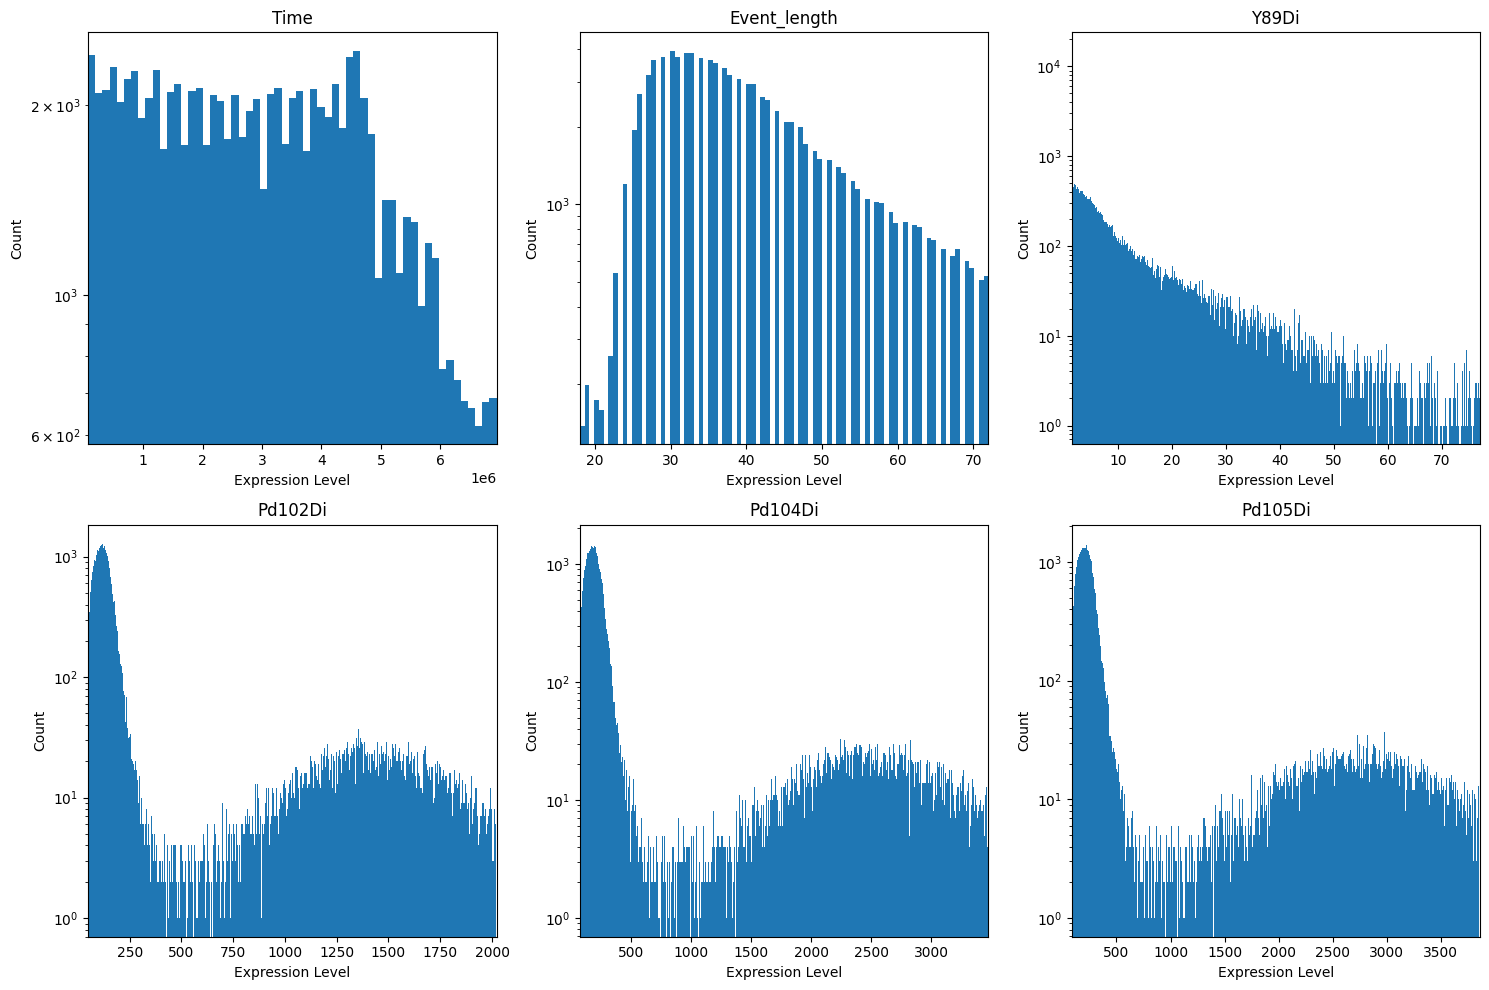

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Pre-calculate bin information for all markers
bin_info = {}
for marker in data.columns:
    q75, q25 = np.percentile(data[marker], [75 ,25])
    bin_width = 2 * (q75 - q25) * len(data[marker])**(-1/3)
    bins = round((data[marker].max() - data[marker].min()) / bin_width)
    x_min = np.percentile(data[marker], 1)  # 1st percentile
    x_max = np.percentile(data[marker], 99)  # 99th percentile
    bin_info[marker] = (bins, x_min, x_max)

# Number of markers per figure
markers_per_figure = 6  # Adjust this based on your preference

# Total number of markers
total_markers = len(data.columns)

# Calculating the number of figures needed
#total_figures = (total_markers + markers_per_figure - 1) // markers_per_figure # Generate plots for all markers. warning: takes ~10s per plot
total_figures = 1 # Generate one example plot
for fig_index in range(total_figures):
    plt.figure(figsize=(15, 10))  # Adjust figure size as needed
    start = fig_index * markers_per_figure
    end = min(start + markers_per_figure, total_markers)
    
    for i, marker in enumerate(data.columns[start:end], 1):
        bins, x_min, x_max = bin_info[marker]
        plt.subplot(2, 3, i)  # Adjust subplot layout as needed
        hist_data = data[marker][(data[marker] >= x_min) & (data[marker] <= x_max)]
        plt.hist(hist_data, bins=bins)
        plt.title(marker)
        plt.xlabel('Expression Level')
        plt.ylabel('Count')
        plt.yscale('log')  # Log-scale y-axis
        plt.xlim([x_min, x_max])  # Dynamic x-limits

    plt.tight_layout()
    plt.show()


In [10]:
import pandas as pd
import itertools
from scipy.stats import pearsonr
import statsmodels.stats.multitest as smm

# Set a threshold for expression level, e.g., 1st percentile across all markers
expression_threshold = {marker: np.percentile(data[marker], 1) for marker in data.columns}

# Define markers for analysis, excluding 'Time' and 'Event_length'
markers = [m for m in data.columns if m not in ('Time', 'Event_length')]

# Filter out markers with no expression
markers = [m for m in markers if data[m].max() > expression_threshold[m]]

# Calculate correlations and p-values for all unique pairs of markers with expression above the threshold
correlation_results = []

for marker1, marker2 in itertools.combinations(markers, 2):
    # Clean data by thresholding
    clean_data = data[(data[marker1] > expression_threshold[marker1]) & (data[marker2] > expression_threshold[marker2])]
    
    # Calculate correlation if there's enough data left
    if len(clean_data) > 1:
        corr, p_val = pearsonr(clean_data[marker1], clean_data[marker2])
        correlation_results.append((marker1, marker2, corr, p_val))
    else:
        correlation_results.append((marker1, marker2, np.nan, np.nan))

# Convert to DataFrame
correlation_df = pd.DataFrame(correlation_results, columns=['Marker1', 'Marker2', 'Correlation', 'P-Value'])

# Remove entries with NaN correlations due to insufficient data
correlation_df.dropna(subset=['Correlation'], inplace=True)

# Adjust the p-values for multiple testing using Benjamini-Hochberg
correlation_df['P-Value Adjusted'] = smm.multipletests(correlation_df['P-Value'], method='fdr_bh')[1]

# Filter out non-significant correlations (You can adjust the alpha level if needed)
significant_correlations_df = correlation_df[correlation_df['P-Value Adjusted'] < 0.05]

# Sort by the strength of the correlation
significant_correlations_df = significant_correlations_df.sort_values(by='Correlation', ascending=False)

# Print summary table
print(significant_correlations_df)

      Marker1  Marker2  Correlation  P-Value  P-Value Adjusted
99    Pd104Di  Pd105Di     0.998087      0.0               0.0
50    Pd102Di  Pd104Di     0.996959      0.0               0.0
51    Pd102Di  Pd105Di     0.996940      0.0               0.0
52    Pd102Di  Pd106Di     0.979964      0.0               0.0
147   Pd105Di  Pd106Di     0.977519      0.0               0.0
...       ...      ...          ...      ...               ...
1051  Gd158Di  Er166Di    -0.225370      0.0               0.0
1022  Gd157Di  Gd158Di    -0.232723      0.0               0.0
936   Eu153Di  Er166Di    -0.248196      0.0               0.0
1023  Gd157Di  Tb159Di    -0.268621      0.0               0.0
927   Eu153Di  Gd157Di    -0.347476      0.0               0.0

[1190 rows x 5 columns]
